# First Activity:

- check if there are highly correlated features and drop them if there are any.
- for the first iteration, we will focus on the  numericals data (numericals data frame) as our data source.
- X-y split (y is the target variable, which is the total claim amount)

# Second Activity:

- X-y split (y is the target variable, which is the total claim amount)
- Train-test split.
- Standardize the data (after the data split).

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import quantile_transform
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import OneHotEncoder  ##. better to use dummy from pandas 
from sklearn.preprocessing import PowerTransformer
from scipy.stats import boxcox
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50


In [3]:
# load ding data 

CA = pd.read_csv("Data_Marketing_Customer_Analysis_Round3.csv")

In [4]:
# checking for data types

CA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10689 entries, 0 to 10688
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   region                         10689 non-null  object
 1   customer_lifetime_value        10689 non-null  int64 
 2   response                       10689 non-null  object
 3   coverage                       10689 non-null  object
 4   education                      10689 non-null  object
 5   effective_to_date              10689 non-null  object
 6   month                          10689 non-null  object
 7   employment_status              10689 non-null  object
 8   gender                         10689 non-null  object
 9   income                         10689 non-null  int64 
 10  location_code                  10689 non-null  object
 11  marital_status                 10689 non-null  object
 12  monthly_premium_auto           10689 non-null  int64 
 13  m

In [5]:
# displaying columns

CA.columns

Index(['region', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'month', 'employment_status',
       'gender', 'income', 'location_code', 'marital_status',
       'monthly_premium_auto', 'months_since_last_claim',
       'months_since_policy_inception', 'number_of_open_complaints',
       'number_of_policies', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'total_claim_amount', 'vehicle_class', 'vehicle_size'],
      dtype='object')

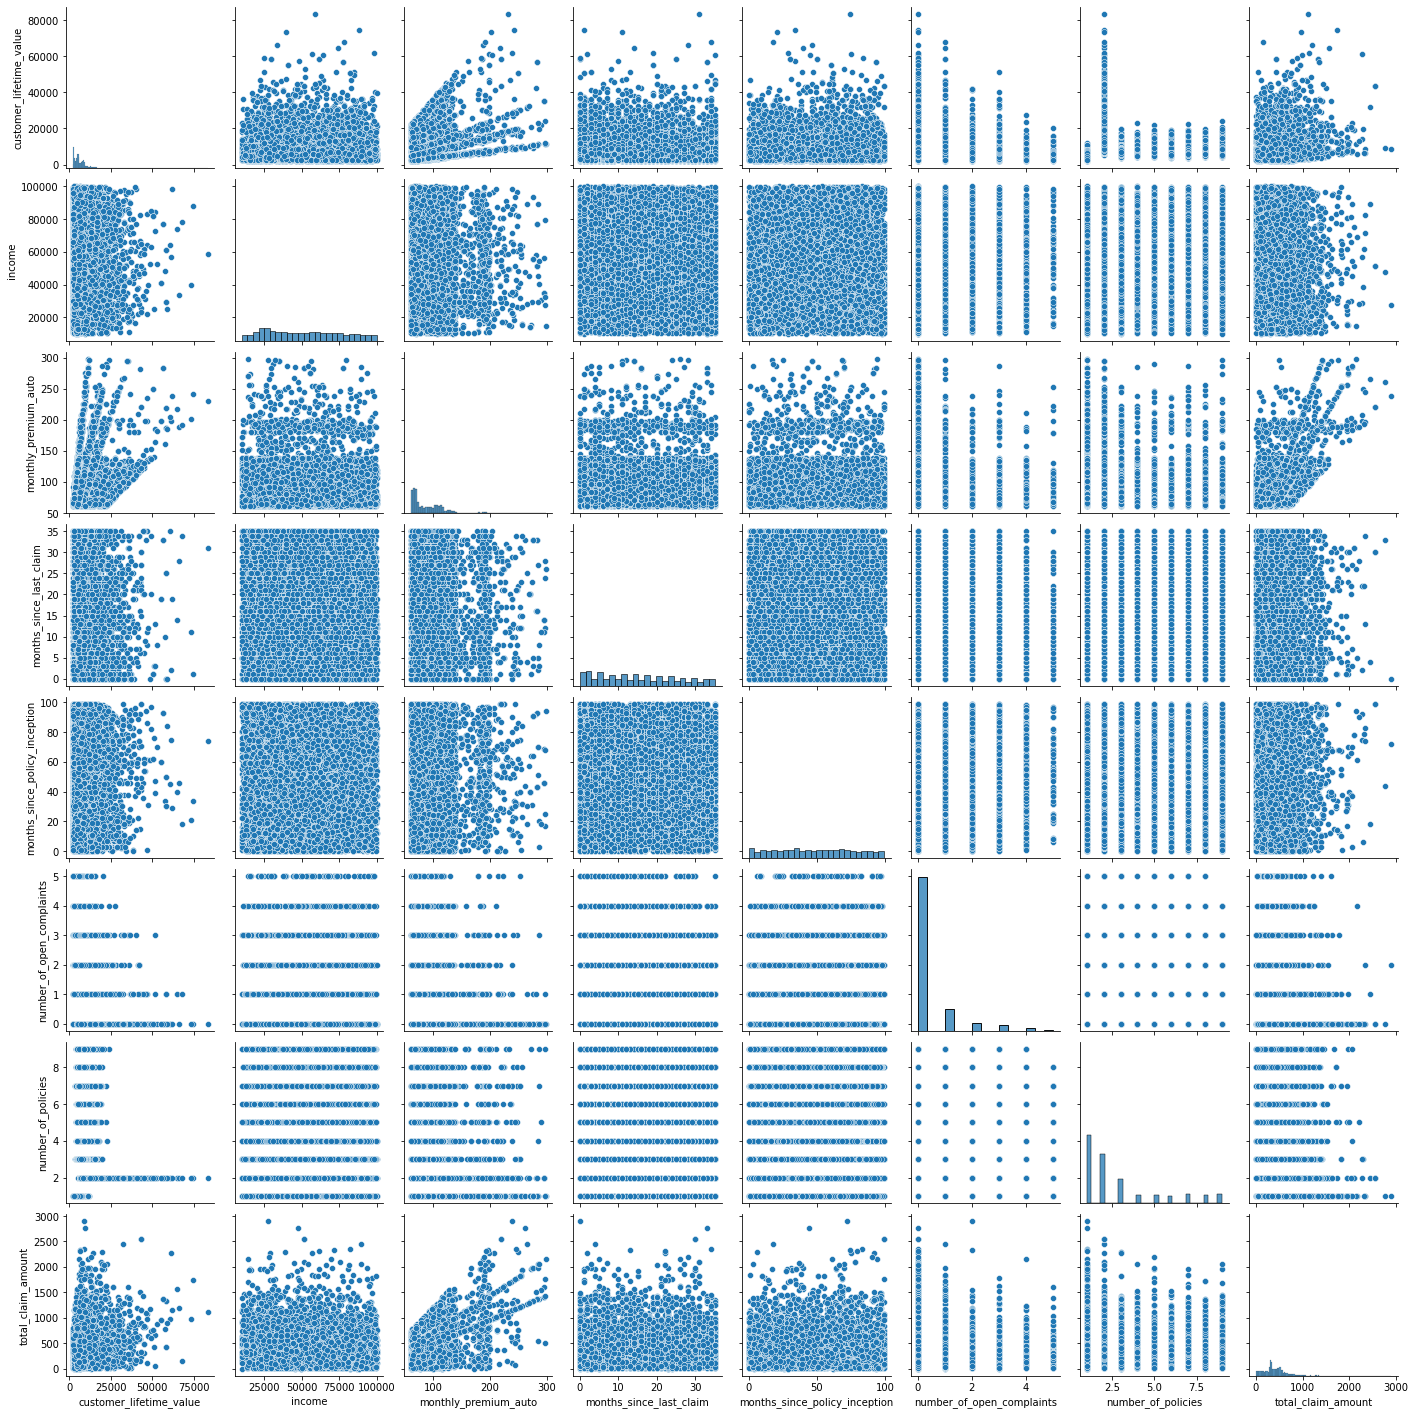

In [5]:
# plotting pairwise, checking linearity of graphs

sns.pairplot(CA)

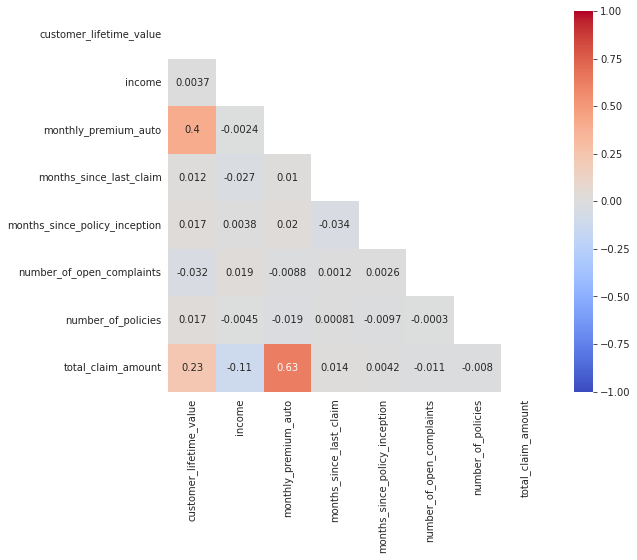

In [6]:
# plotting for multicollinearity
# should be done only for numerical variables

corr = CA.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9, 7))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

In [7]:
# checking for highly correlated columns (output empty list, because no correlation > 0.75)

corr_matrix = CA.corr().abs()
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(bool))
[column for column in upper_triangle.columns if any(upper_triangle[column] > 0.75)]

[]

array([[<AxesSubplot:title={'center':'customer_lifetime_value'}>,
        <AxesSubplot:title={'center':'income'}>,
        <AxesSubplot:title={'center':'monthly_premium_auto'}>],
       [<AxesSubplot:title={'center':'months_since_last_claim'}>,
        <AxesSubplot:title={'center':'months_since_policy_inception'}>,
        <AxesSubplot:title={'center':'number_of_open_complaints'}>],
       [<AxesSubplot:title={'center':'number_of_policies'}>,
        <AxesSubplot:title={'center':'total_claim_amount'}>,
        <AxesSubplot:>]], dtype=object)

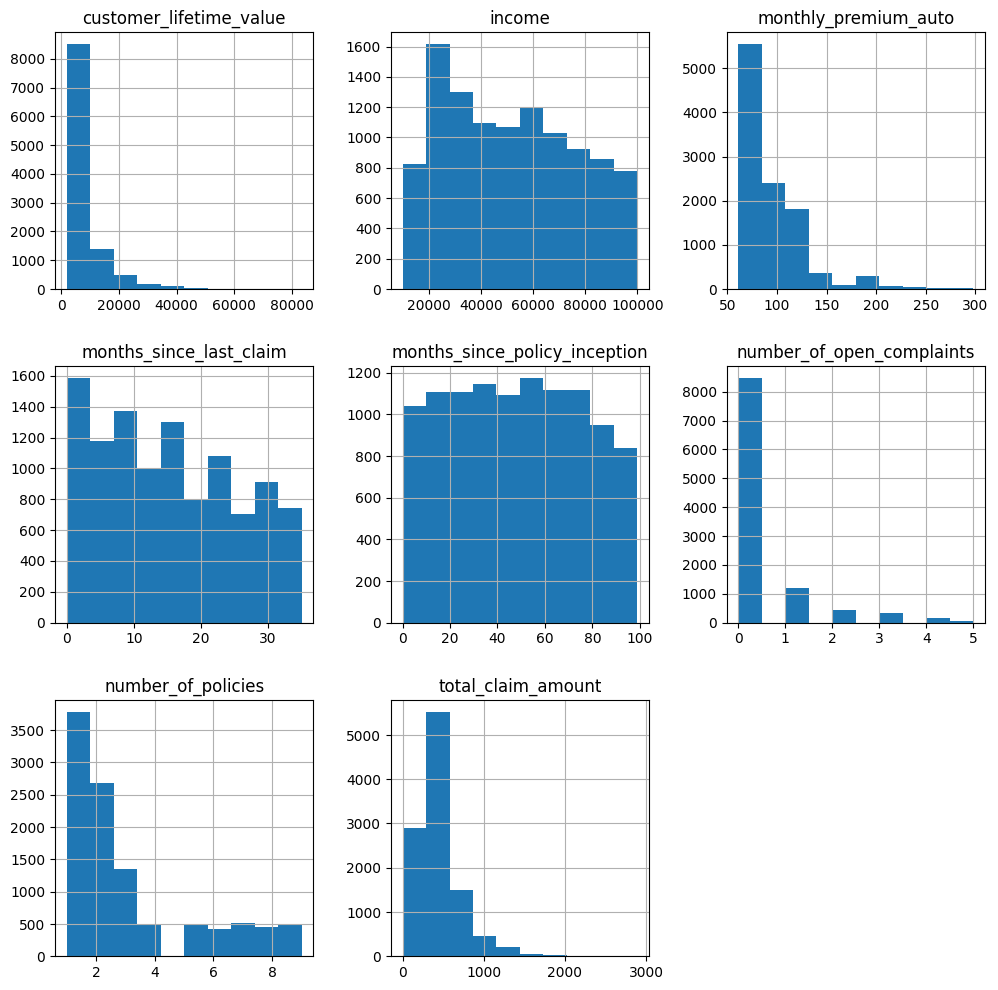

In [8]:
# checking distribution in histograms (for numerical values only)

CA.hist(figsize=(12,12))

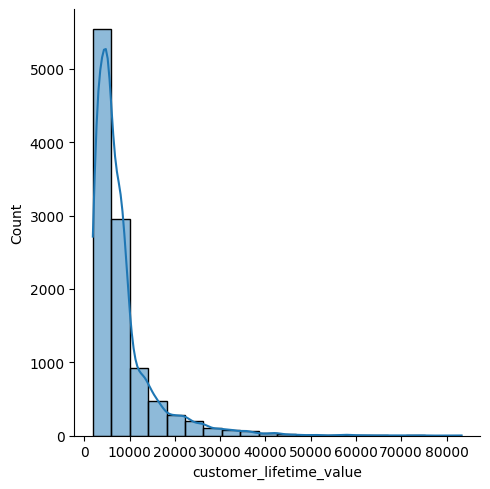

In [69]:
# checking distribution plot

sns.displot((CA['customer_lifetime_value']), bins = 20, kde = True)

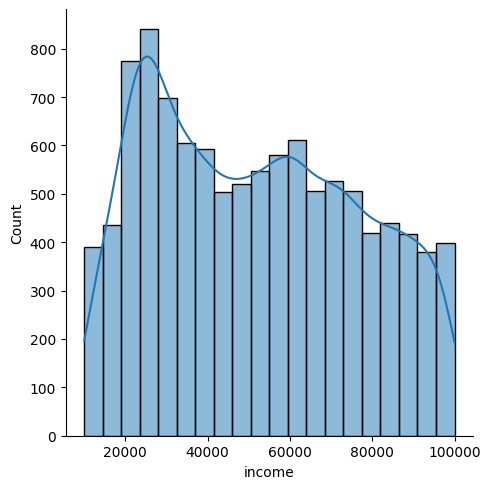

In [9]:
# checking distribution plot

sns.displot((CA['income']), bins = 20, kde = True)

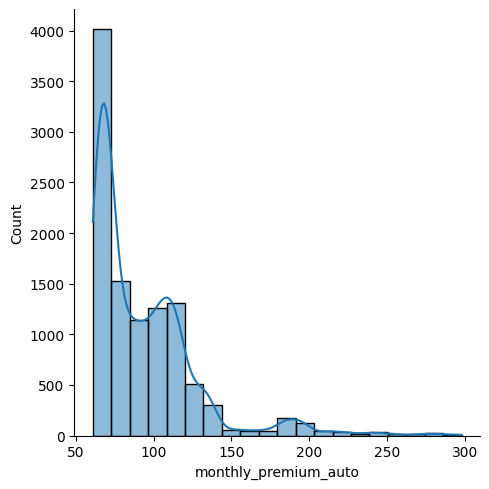

In [10]:
# checking distribution plot

sns.displot((CA['monthly_premium_auto']), bins = 20, kde = True)

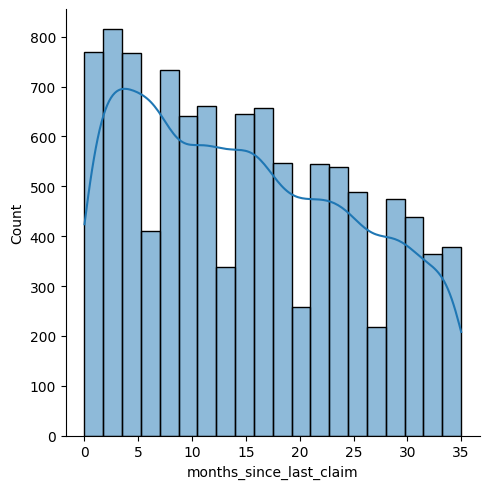

In [73]:
# checking distribution plot

sns.displot((CA['months_since_last_claim']), bins = 20, kde = True)

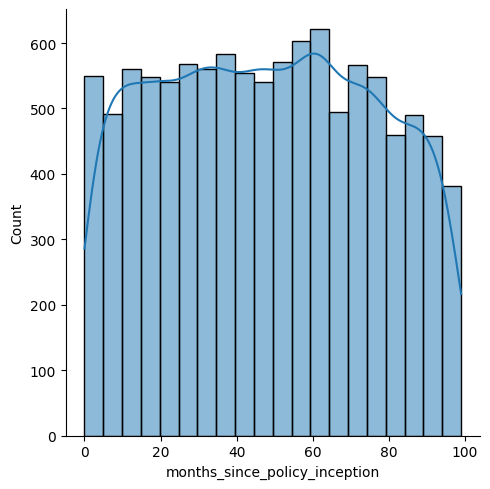

In [11]:
# checking distribution plot

sns.displot((CA['months_since_policy_inception']), bins = 20, kde = True)

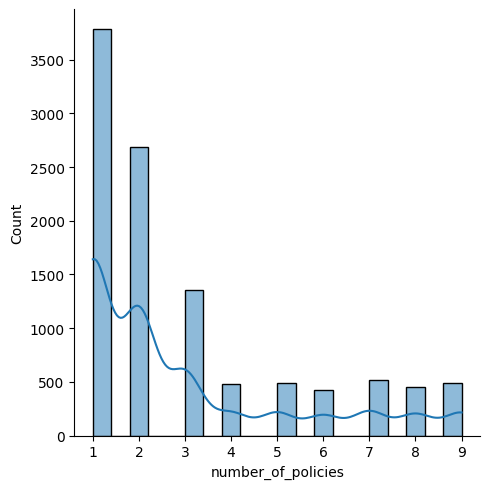

In [12]:
# checking distribution plot

sns.displot((CA['number_of_policies']), bins = 20, kde = True)

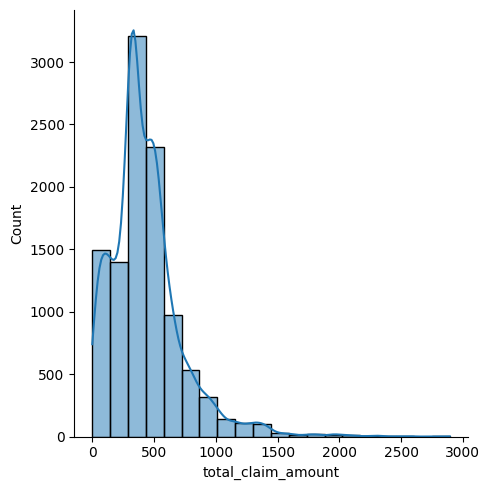

In [76]:
# checking distribution plot

sns.displot((CA['total_claim_amount']), bins = 20, kde = True)

In [13]:
# displaying object in table 

categoricals_features = CA.select_dtypes("object")
categoricals_features

,region,response,coverage,education,effective_to_date,month,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,central,no,basic,college,2/18/11,feb,employed,m,suburban,married,corporate auto,corporate l3,offer3,agent,four-door car,medsize
1,west region,no,basic,college,1/18/11,jan,unemployed,f,suburban,single,personal auto,personal l3,offer4,call center,four-door car,medsize
2,east,no,basic,bachelor,2/10/11,feb,employed,m,suburban,single,personal auto,personal l3,offer3,call center,suv,medsize
3,north west,yes,extended,college,1/11/11,jan,employed,m,suburban,single,corporate auto,corporate l3,offer2,branch,four-door car,medsize
4,north west,no,premium,bachelor,1/17/11,jan,medical leave,f,suburban,married,personal auto,personal l2,offer1,branch,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,no,premium,bachelor,1/19/11,jan,unemployed,f,suburban,married,personal auto,personal l1,offer3,web,luxury car,medsize
10685,north west,no,basic,college,1/6/11,jan,employed,f,urban,married,personal auto,personal l3,offer2,branch,four-door car,medsize
10686,central,no,extended,bachelor,2/6/11,feb,employed,f,rural,married,corporate auto,corporate l3,offer1,web,luxury suv,medsize
10687,west region,no,premium,college,2/13/11,feb,employed,f,urban,divorced,personal auto,personal l1,offer1,branch,suv,medsize


In [14]:
categoricals_features = pd.get_dummies(categoricals_features[["region", "response", "location_code", "marital_status", "effective_to_date", "policy_type", "policy", "sales_channel", "vehicle_class"]], first = True)
categoricals_features

,region_east,region_north west,region_west region,response_yes,location_code_suburban,location_code_urban,marital_status_married,marital_status_single,effective_to_date_1/10/11,effective_to_date_1/11/11,...,policy_special l2,policy_special l3,sales_channel_branch,sales_channel_call center,sales_channel_web,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car
0,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,0,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,1,0,1,1,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
4,0,1,0,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,1,0,0,0,0
10685,0,1,0,0,0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
10686,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0
10687,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [15]:
CA.columns
CA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10689 entries, 0 to 10688
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   region                         10689 non-null  object
 1   customer_lifetime_value        10689 non-null  int64 
 2   response                       10689 non-null  object
 3   coverage                       10689 non-null  object
 4   education                      10689 non-null  object
 5   effective_to_date              10689 non-null  object
 6   month                          10689 non-null  object
 7   employment_status              10689 non-null  object
 8   gender                         10689 non-null  object
 9   income                         10689 non-null  int64 
 10  location_code                  10689 non-null  object
 11  marital_status                 10689 non-null  object
 12  monthly_premium_auto           10689 non-null  int64 
 13  m

In [19]:
# X Y split

X = CA.drop("total_claim_amount", axis = 1)
y = CA.customer_lifetime_value

In [20]:
X = X._get_numeric_data()

In [21]:
X = X.drop("number_of_open_complaints", axis = 1)

In [23]:
# Data splitting

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)

In [24]:
# Standardizing Data

# finding the parameters ( mean, variance from the training set )

std_scaler = StandardScaler().fit(X_train) 

In [25]:
# transforming the training set

X_train_scaled = std_scaler.transform(X_train)

In [26]:
X_train_scaled.shape

(7482, 6)

In [27]:
# use parameters from the training set to transform the test set

X_test_scaled = std_scaler.transform(X_test)

In [28]:
print(X_train_scaled)
print("--------")
print(X_test_scaled)

[[-0.11021627 -1.27291744 -0.67143823  0.77999322  1.36516733 -0.40381143]
 [-0.42794064  0.74729478 -0.72925469 -0.90288055  1.68786198  0.84759702]
 [-0.5223013   0.26592193  0.48489091 -0.90288055  0.50464827 -0.82094758]
 ...
 [-0.81132612 -1.17224873 -0.90270406 -1.00187313 -1.39566466 -0.82094758]
 [ 2.25575772  0.98537142 -0.78707115  0.97797837 -1.61079442 -0.40381143]
 [ 1.18923585  0.68583346 -0.55580532  0.87898579  0.21780858 -0.40381143]]
--------
[[-0.40967729  1.58428551 -0.61362178  0.28503034  1.54444214  2.51614162]
 [-0.7597249  -0.93947257 -0.64253     1.47294124  0.755633   -0.82094758]
 [ 0.57248529 -1.23371005 -0.90270406 -1.496836    0.39708339 -0.40381143]
 ...
 [-0.79857077 -1.05867274 -0.58471355  0.87898579 -1.18053489 -0.82094758]
 [-0.42547654 -0.97370317 -0.81597938  0.58200807 -1.61079442  0.43046087]
 [-0.49881985 -0.95695203  0.71615674  1.76991896 -1.00126009 -0.82094758]]
